In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# ***Data Loading***

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 39134 files belonging to 21 classes.
Found 9783 files belonging to 21 classes.


In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
ep = 3
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/3
1223/1223 [==============================] - 4228s 3s/step - loss: 1.0025 - accuracy: 0.6761 - val_loss: 0.4899 - val_accuracy: 0.8338
Epoch 2/3
1223/1223 [==============================] - 399s 326ms/step - loss: 0.4340 - accuracy: 0.8553 - val_loss: 0.3359 - val_accuracy: 0.8865
Epoch 3/3
1223/1223 [==============================] - 398s 325ms/step - loss: 0.2822 - accuracy: 0.9037 - val_loss: 0.2848 - val_accuracy: 0.9054


In [ ]:
model.save('/content/drive/My Drive/pd_h5/pd_scratch_1.h5')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_scratch_1.h5')

In [ ]:
ep = 3
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/3
1223/1223 [==============================] - 5514s 4s/step - loss: 0.1997 - accuracy: 0.9324 - val_loss: 0.2722 - val_accuracy: 0.9095
Epoch 2/3
1223/1223 [==============================] - 395s 322ms/step - loss: 0.1526 - accuracy: 0.9472 - val_loss: 0.1683 - val_accuracy: 0.9420
Epoch 3/3
1223/1223 [==============================] - 393s 321ms/step - loss: 0.1154 - accuracy: 0.9599 - val_loss: 0.1860 - val_accuracy: 0.9388


In [ ]:
model.save('/content/drive/My Drive/pd_h5/pd_scratch_4.h5')

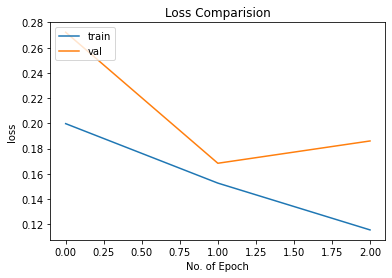

In [ ]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

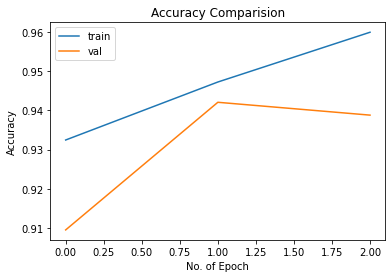

In [ ]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 95.99 %
Test Accuracy   : 93.88 %
Precision Score : 93.88 %
Recall Score    : 93.88 %


# **Confusion**

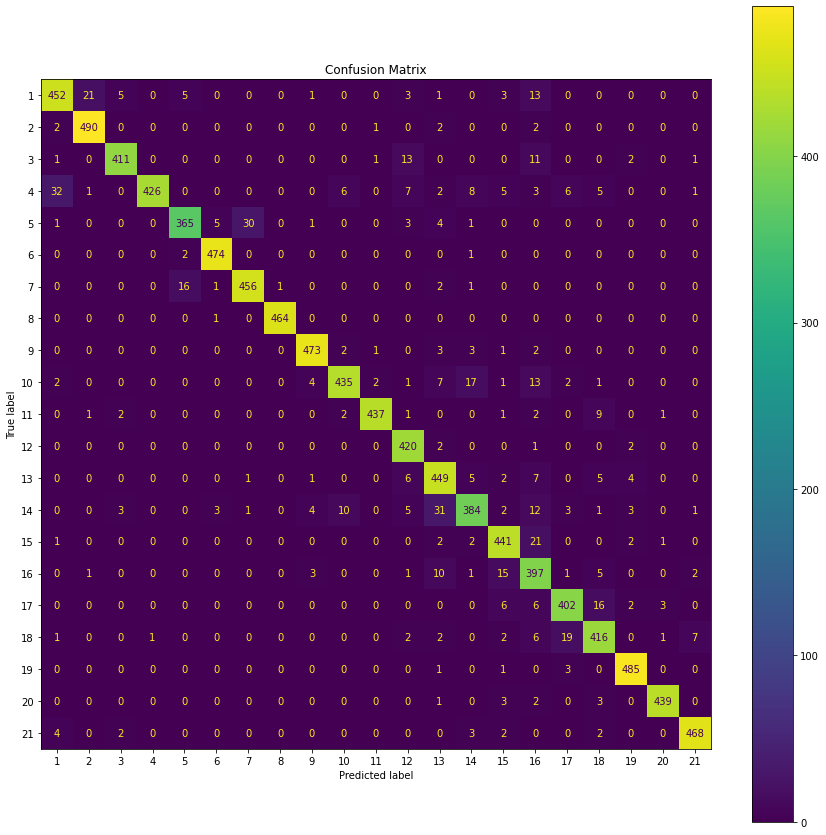

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_scratch_4.h5')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
diseases=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

Apple___Cedar_apple_rust


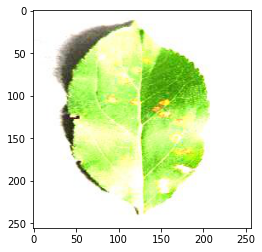

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/AppleCedarRust1.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

Apple___Cedar_apple_rust


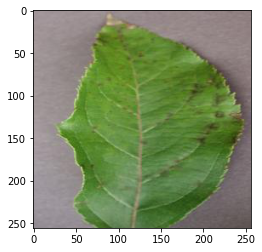

In [ ]:
# Wrongly Predicted output
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/AppleScab1.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

Corn_(maize)___Common_rust


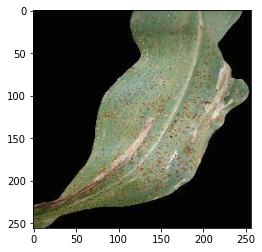

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/CornCommonRust1.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

Potato___Early_blight


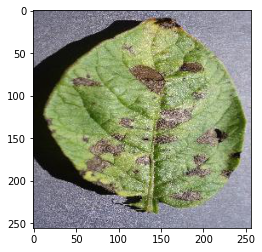

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/PotatoEarlyBlight2.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

In [ ]:
test_gen_act = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/test_act",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)

test_gen_act  = test_gen_act.map(lambda image,label:(rescale(image),label))

Found 33 files belonging to 21 classes.


In [ ]:
labels = []
predictions = []
for x,y in test_gen_act:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 78.79 %
Precision Score : 78.79 %
Recall Score    : 78.79 %


***References***
<br>
https://www.kaggle.com/vishnu0399/leaf-disease-classification-cnn-96-accuracy